In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
df = pd.read_csv('../data/mbike_NamedStations_StartEndOnly.csv', index_col=0)

print(str(len(df.index)) + " Starting/Ending trip bike events.")
print(str(len(df.Coords_Latitude.unique())) + " unique Latitude Coordinates.")
print(str(len(df.Coords_Longitude.unique())) + " unique Longitude Coordinates.")


156602 Starting/Ending trip bike events.
24 unique Latitude Coordinates.
24 unique Longitude Coordinates.


## We will convert the current data_time to a python datetime object, then get the day of the week this corresponds to. 

In [99]:
def fixDateTime(row):
    s = row['Date_Time'].split("T")
    t = s[1].split(".")[0]
    date = s[0]
    datetime = date +" " + t
    #print(date)
    return pd.Series([datetime])

df[['Date_Time']] = df.apply(fixDateTime, axis=1)
df['Date_Time'] = pd.to_datetime(df['Date_Time'], errors='coerce')
df['Day'] = pd.to_datetime(df['Date_Time']).dt.dayofweek
df.head(1)

AttributeError: ("'Timestamp' object has no attribute 'split'", 'occurred at index 0')

In [64]:
#df['TimeofDay'] = pd.to_datetime(df['Date_Time']).dt.dayofweek
df.head(5)

,Coords_Latitude,Coords_Longitude,Trip_ID,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
0,38.978129,-76.929079,Hf3aj78RcGaJJMGRn,StartTrip,24Tswou857XKT9R65,2017-06-14 19:02:21,2017-06-14,19:02:21,College Park Metro West,2
1,38.978129,-76.929079,tp7QKuiJX9DvLKDcf,StartTrip,24Tswou857XKT9R65,2017-06-15 20:07:14,2017-06-15,20:07:14,College Park Metro West,3
2,38.972794,-76.938213,tp7QKuiJX9DvLKDcf,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-15 20:19:43,2017-06-15,20:19:43,Queens Chapel,3
3,38.978129,-76.929079,j7xEWoy65rDsJfk7M,StartTrip,24Tswou857XKT9R65,2017-06-17 22:25:55,2017-06-17,22:25:55,College Park Metro West,5
4,38.972794,-76.938213,j7xEWoy65rDsJfk7M,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-17 22:36:07,2017-06-17,22:36:07,Queens Chapel,5


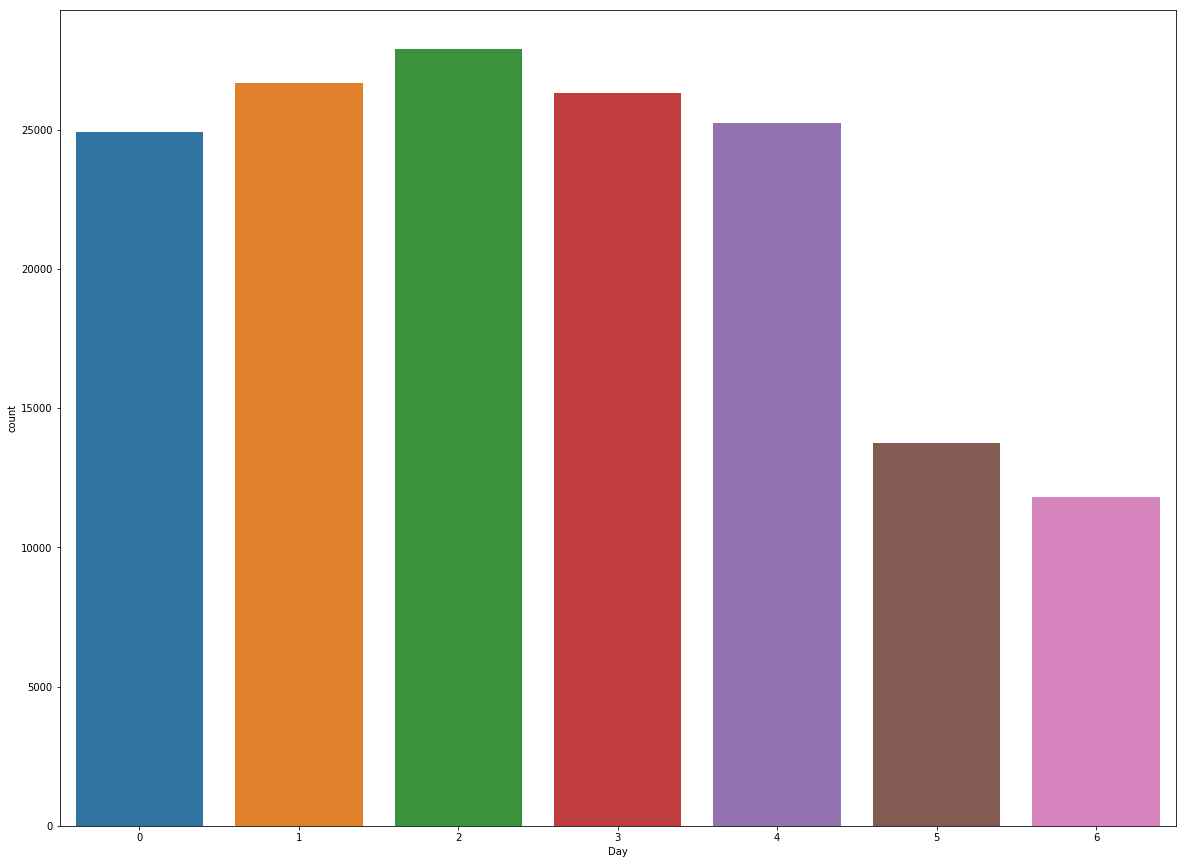

In [65]:
sns.countplot(x="Day", data= df)

(0, 400)

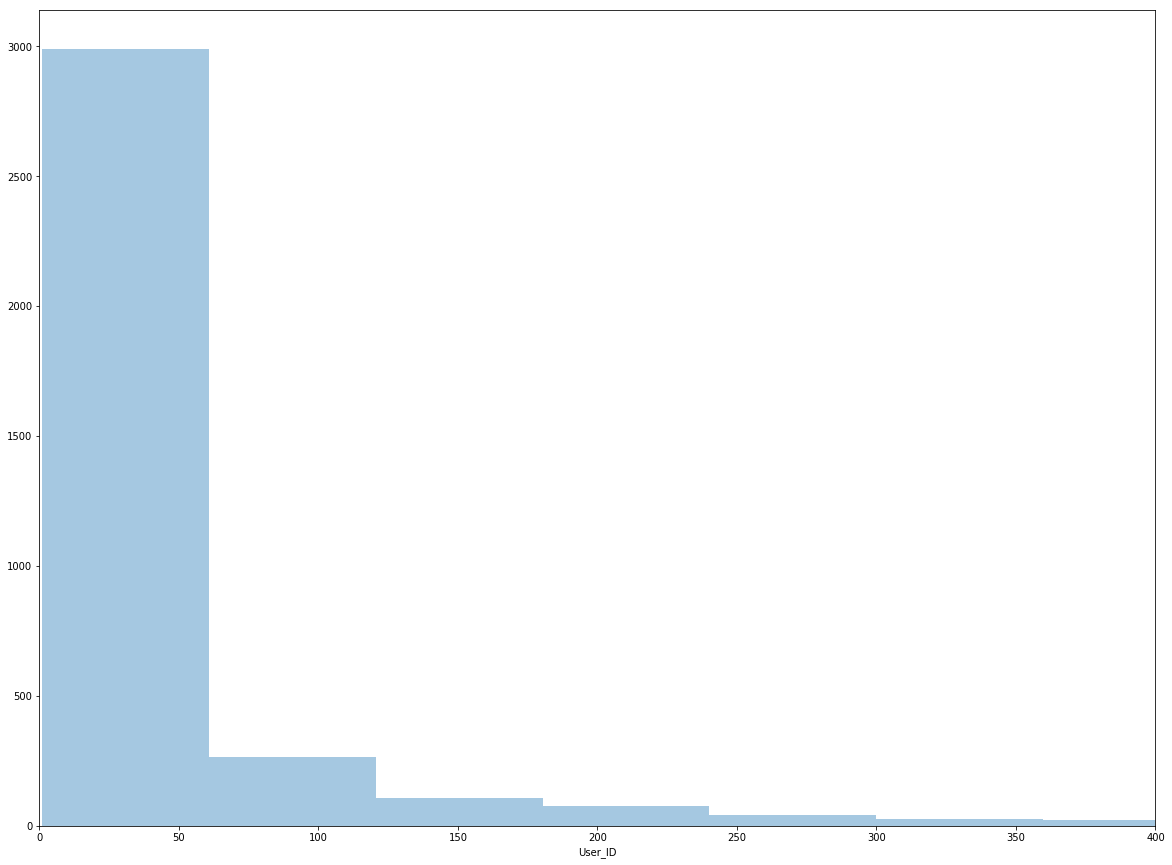

In [66]:
sns.distplot(df['User_ID'].value_counts()[:], norm_hist=False, kde=False)
plt.xlim(0,400)

In [67]:
df.head(5).Date_Time.dt.dayofweek

0    2
1    3
2    3
3    5
4    5
Name: Date_Time, dtype: int64

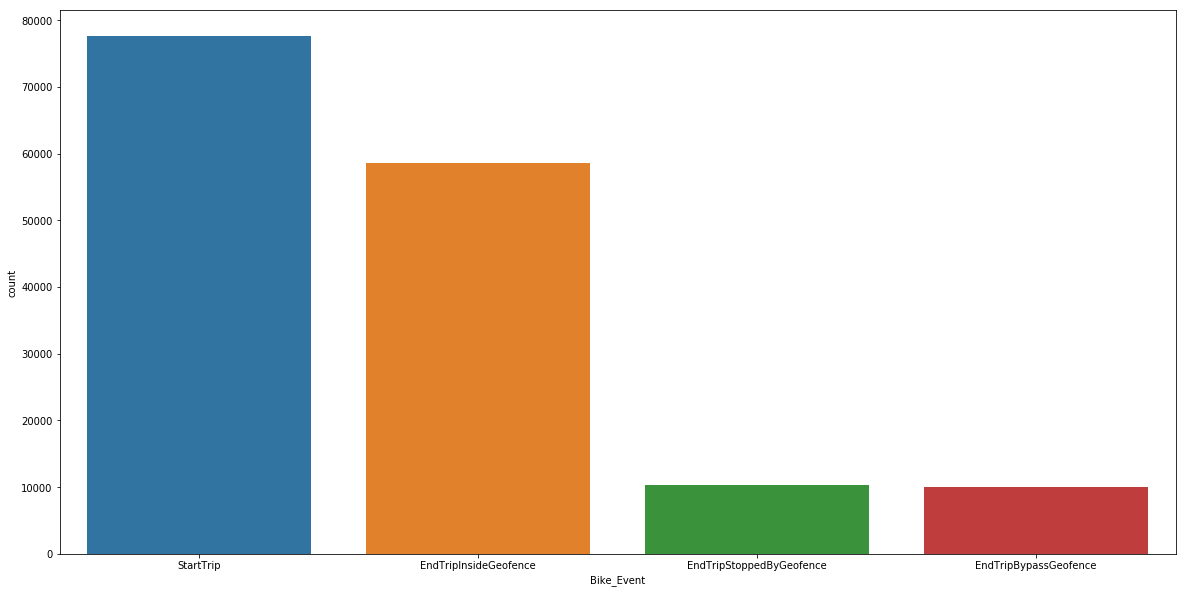

In [68]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.countplot(df.Bike_Event)

In [69]:
df.Bike_Event.value_counts()

StartTrip                   77600
EndTripInsideGeofence       58665
EndTripStoppedByGeofence    10357
EndTripBypassGeofence        9980
Name: Bike_Event, dtype: int64

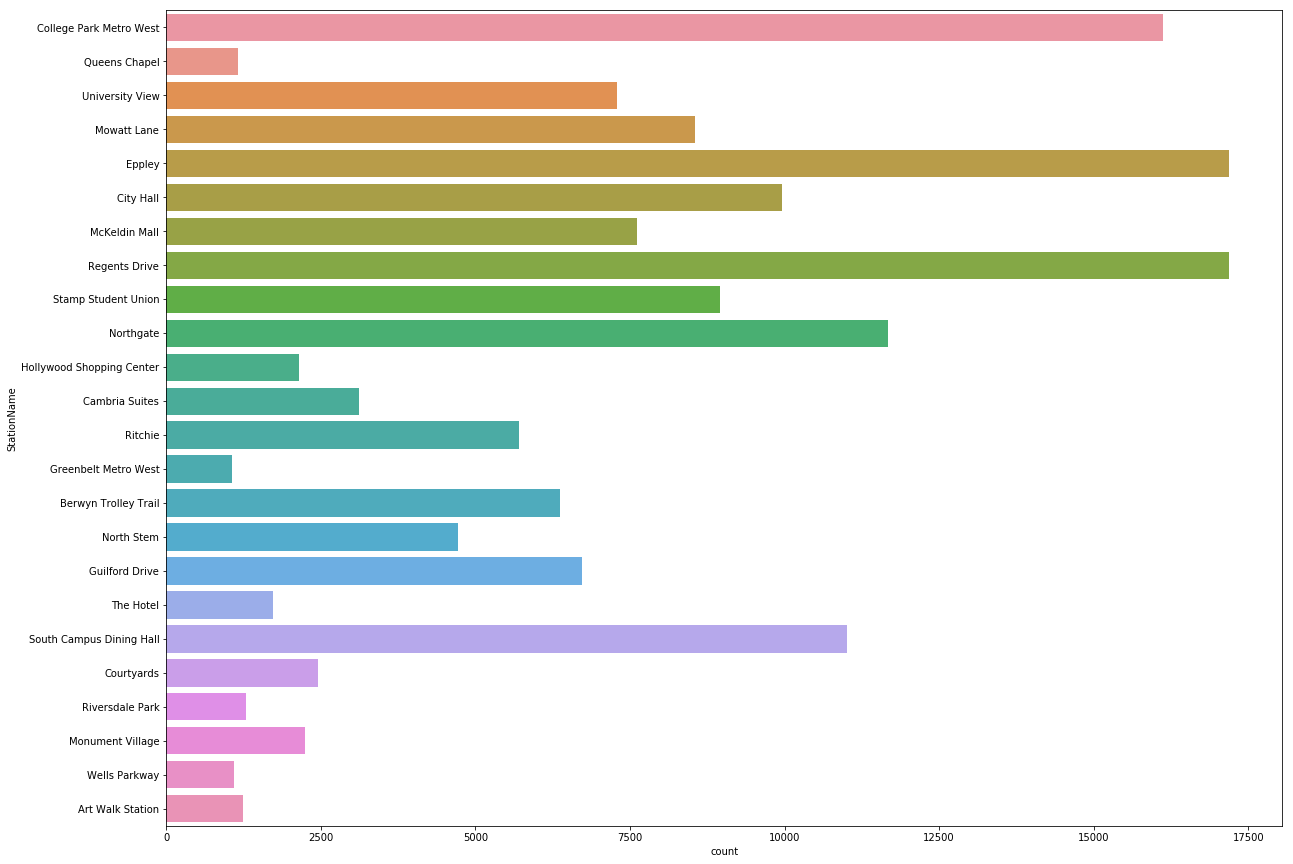

In [70]:
plt.rcParams['figure.figsize'] = [20, 15]
ax = sns.countplot(y="StationName", data=df)

In [71]:
dfStation = pd.read_csv('../data/stationsInfo.csv')
dfStation.head(3)

,Name,Altitude,Longitude,Latitude
0,Hollywood Shopping Center,42,-76.921340,39.013710
1,Greenbelt Metro West,30,-76.913859,39.010546
2,Monument Village,40,-76.930522,39.004601


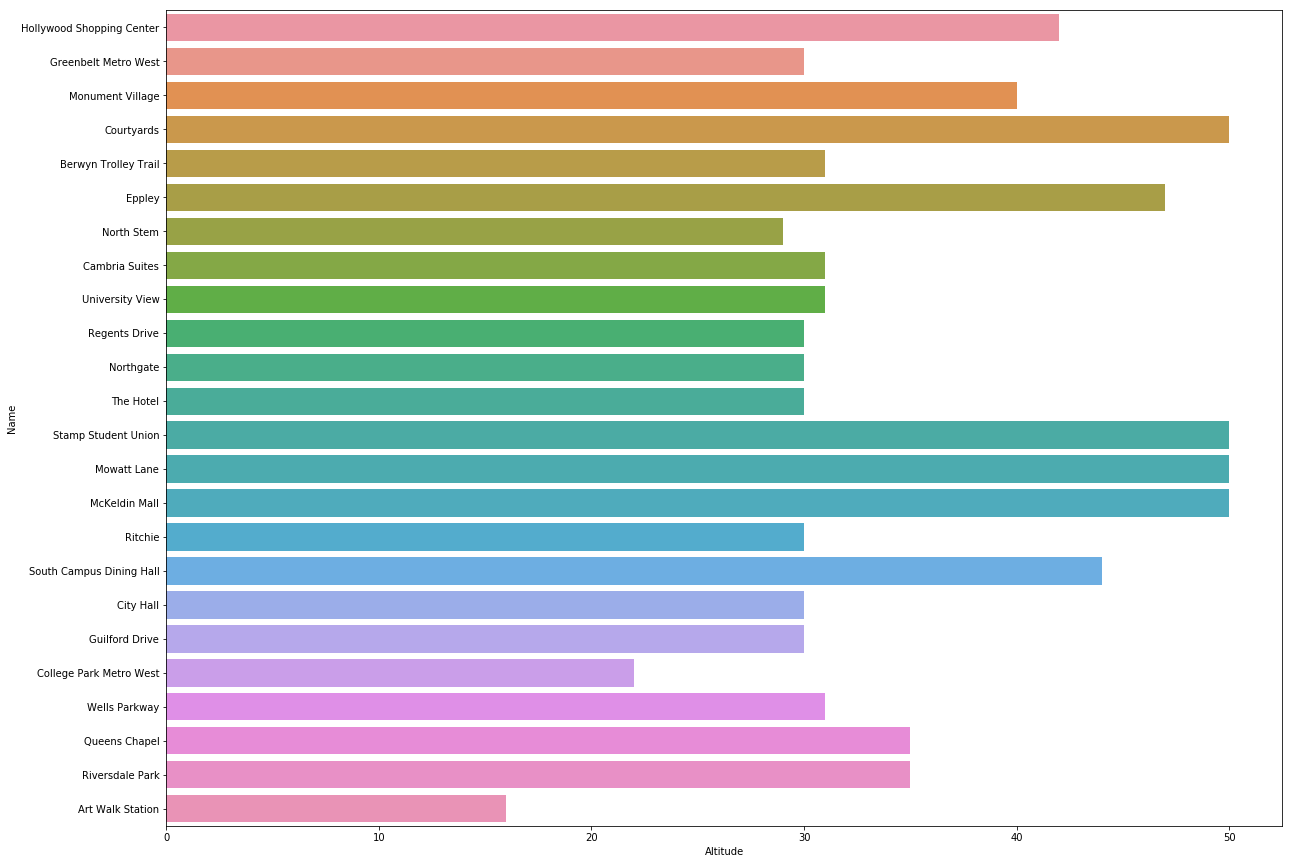

In [72]:
#sns.countplot(y="StationName")
ax = sns.barplot(y="Name", x="Altitude", data=dfStation)

In [73]:
df.head(5)

,Coords_Latitude,Coords_Longitude,Trip_ID,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
0,38.978129,-76.929079,Hf3aj78RcGaJJMGRn,StartTrip,24Tswou857XKT9R65,2017-06-14 19:02:21,2017-06-14,19:02:21,College Park Metro West,2
1,38.978129,-76.929079,tp7QKuiJX9DvLKDcf,StartTrip,24Tswou857XKT9R65,2017-06-15 20:07:14,2017-06-15,20:07:14,College Park Metro West,3
2,38.972794,-76.938213,tp7QKuiJX9DvLKDcf,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-15 20:19:43,2017-06-15,20:19:43,Queens Chapel,3
3,38.978129,-76.929079,j7xEWoy65rDsJfk7M,StartTrip,24Tswou857XKT9R65,2017-06-17 22:25:55,2017-06-17,22:25:55,College Park Metro West,5
4,38.972794,-76.938213,j7xEWoy65rDsJfk7M,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-17 22:36:07,2017-06-17,22:36:07,Queens Chapel,5


In [74]:
# Split into da
dfStart = df[df["Bike_Event"] == 'StartTrip'] # 77600
dfEnd = df[df["Bike_Event"]!= 'StartTrip']  # 79002, df total : #156602 
# So, -1402 (More ends than starts). Should an end be weighted? If so: 0.98225
# is how much less it should be.


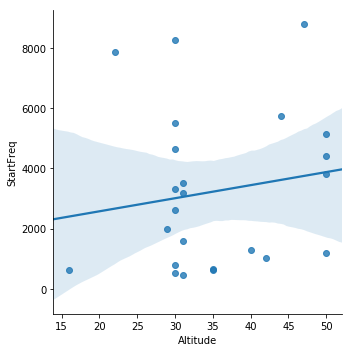

In [75]:
#How correlated is altitude to usage?
dfPlot = pd.DataFrame(dfStart.StationName.value_counts())#Returns a series in descending order, converts to df
dfPlot1 = pd.DataFrame(dfEnd.StationName.value_counts())
dfPlot.columns = ['StartFreq']
dfPlot1.columns = ['EndFreq']
# dfmergeSE consists of Stations and info, and the number of start/end trips.
dfmergeS = dfStation.join(dfPlot, on='Name')
dfmergeSE = dfmergeS.join(dfPlot1, on='Name')
sns.lmplot(x='Altitude', y='StartFreq', data=dfmergeSE)
dfmergeSE['Net'] = dfmergeSE['StartFreq']-dfmergeSE['EndFreq']
dfmergeSE['Net_Norm'] = dfmergeSE['StartFreq']-0.98225*dfmergeSE['EndFreq']

In [76]:
dfmergeSE.Net.sum()

-1402

In [77]:
dfmergeSE.Net_Norm.sum()

0.2855000000022301

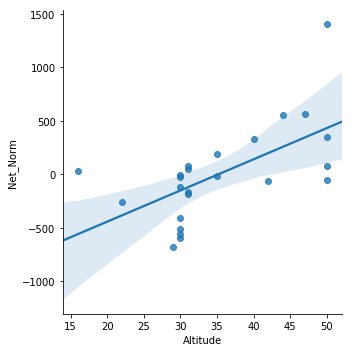

In [78]:
sns.lmplot(x='Altitude', y='Net_Norm', data=dfmergeSE)


In [79]:
'''from scipy import stats
# Use scipy.stats to get the linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(dfmergeSE['Altitude'],dfmergeSE['StartTrips'])

# Pass parameters of fit using line_kws for legend
ax = sns.regplot(x="Altitude", y="Net_Norm", data=dfmergeSE, 
 line_kws={'label':"y={0:.1f}x+{1:.1f} | r={2:f}".format(slope,intercept,r_value)})
ax.legend()
plt.show()'''

'from scipy import stats\n# Use scipy.stats to get the linear fit\nslope, intercept, r_value, p_value, std_err = stats.linregress(dfmergeSE[\'Altitude\'],dfmergeSE[\'StartTrips\'])\n\n# Pass parameters of fit using line_kws for legend\nax = sns.regplot(x="Altitude", y="Net_Norm", data=dfmergeSE, \n line_kws={\'label\':"y={0:.1f}x+{1:.1f} | r={2:f}".format(slope,intercept,r_value)})\nax.legend()\nplt.show()'

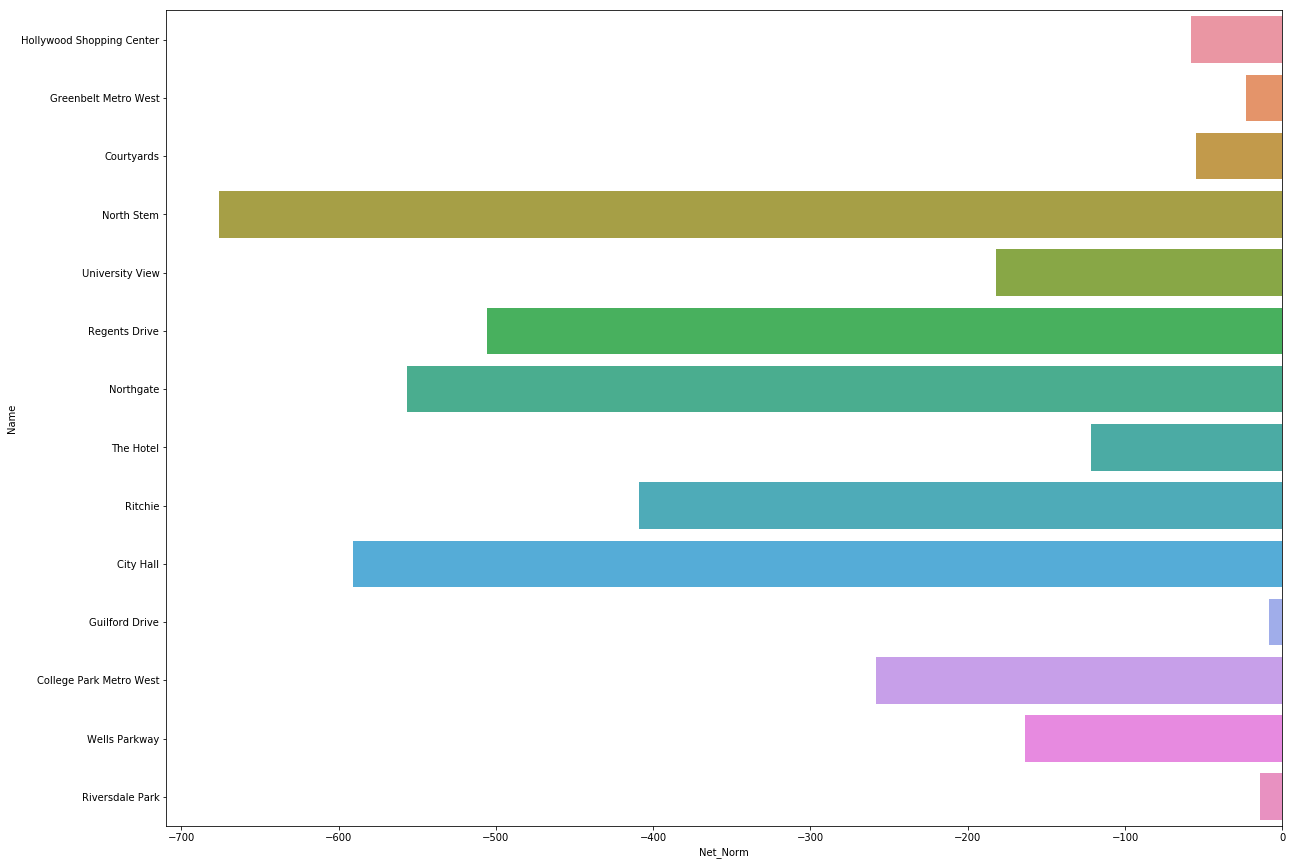

In [80]:
ax = sns.barplot(y="Name", x="Net_Norm", data=dfmergeSE[dfmergeSE['Net_Norm'] < 0])


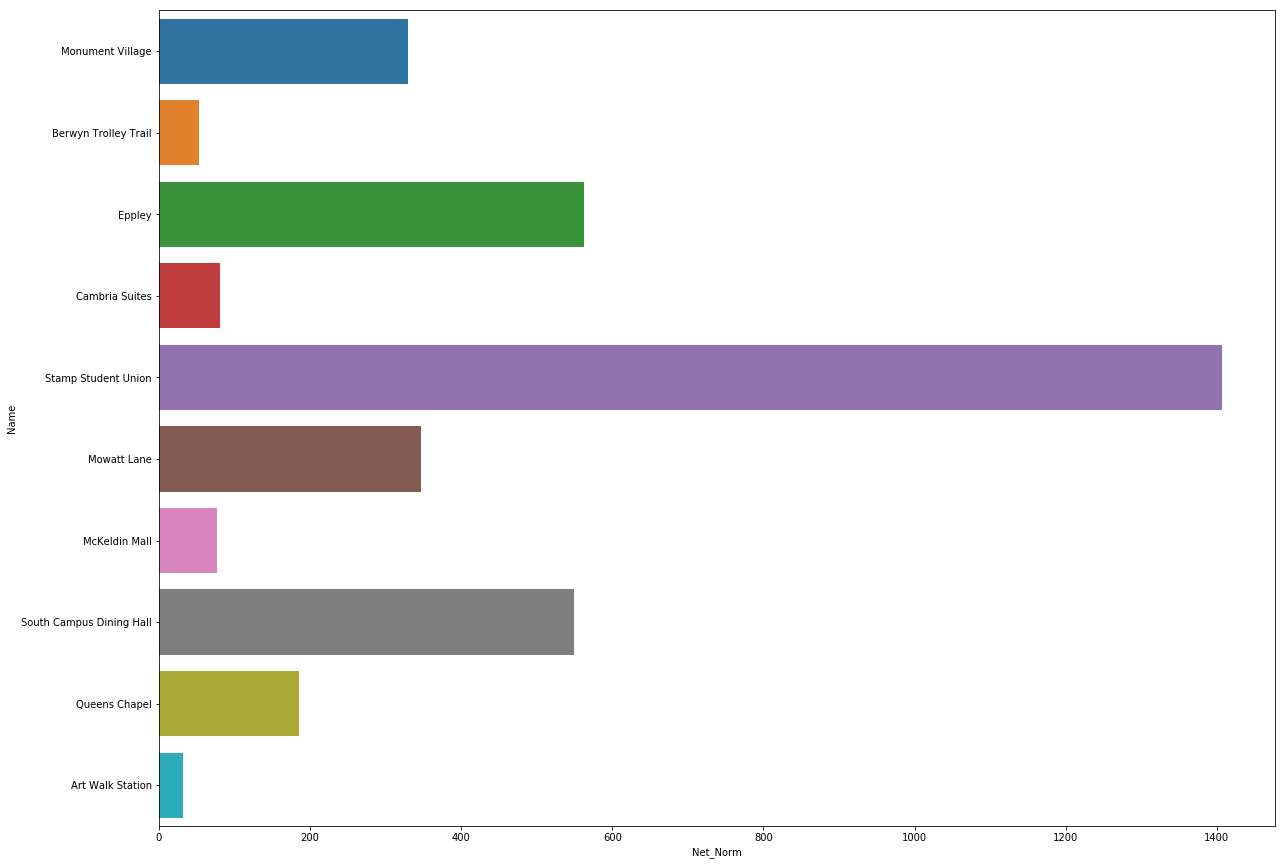

In [81]:
ax = sns.barplot(y="Name", x="Net_Norm", data=dfmergeSE[dfmergeSE['Net_Norm'] > 0])


In [187]:
dfmergeSE.head(5)
dfmergeSE.to_csv("stationsInfo_TripCounts.csv")

,Name,Altitude,Longitude,Latitude,StartFreq,EndFreq,Net,Net_Norm
0,Hollywood Shopping Center,42,-76.921340,39.013710,1036,1114,-78,-58.22650
1,Greenbelt Metro West,30,-76.913859,39.010546,514,547,-33,-23.29075
2,Monument Village,40,-76.930522,39.004601,1279,966,313,330.14650
3,Courtyards,50,-76.942093,39.002302,1185,1262,-77,-54.59950
4,Berwyn Trolley Trail,31,-76.926618,38.994689,3180,3184,-4,52.51600


In [83]:
import folium
m = folium.Map(location=[dfmergeSE['Latitude'].mean(),dfmergeSE['Longitude'].mean()], zoom_start=14)

# Red will mean more bikes ended than started, Blue means more started than ended
for i in range(0,len(dfmergeSE)):
    net_norm = dfmergeSE.iloc[i]['Net_Norm']
    if (net_norm>0): 
        c ='crimson'
    else: 
        c = 'blue' 

    folium.Circle(
      location=[dfmergeSE.iloc[i]['Latitude'], dfmergeSE.iloc[i]['Longitude']],
      popup=dfmergeSE.iloc[i]['Name'],
      radius=abs(net_norm)*(0.15),
      color=c,
      fill=True,
      fill_color=c
   ).add_to(m)
m
m.save('mymap.html')

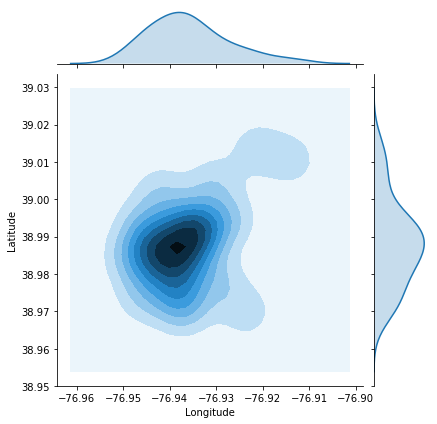

In [84]:
g = sns.jointplot("Longitude", "Latitude", data=dfmergeSE, kind="kde",joint_kws=dict(gridsize=35))

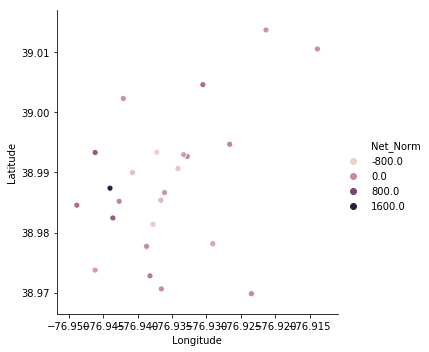

In [85]:
sns.relplot(x="Longitude", y="Latitude", hue="Net_Norm", data=dfmergeSE);

In [87]:
dfS = dfStart.set_index("Trip_ID")
dfE = dfEnd.set_index("Trip_ID")

In [88]:
dfS.head(3)

,Coords_Latitude,Coords_Longitude,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
Trip_ID,,,,,,,,,
Hf3aj78RcGaJJMGRn,38.978129,-76.929079,StartTrip,24Tswou857XKT9R65,2017-06-14 19:02:21,2017-06-14,19:02:21,College Park Metro West,2
tp7QKuiJX9DvLKDcf,38.978129,-76.929079,StartTrip,24Tswou857XKT9R65,2017-06-15 20:07:14,2017-06-15,20:07:14,College Park Metro West,3
j7xEWoy65rDsJfk7M,38.978129,-76.929079,StartTrip,24Tswou857XKT9R65,2017-06-17 22:25:55,2017-06-17,22:25:55,College Park Metro West,5


In [90]:
dfE.head(3)

,Coords_Latitude,Coords_Longitude,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
Trip_ID,,,,,,,,,
tp7QKuiJX9DvLKDcf,38.972794,-76.938213,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-15 20:19:43,2017-06-15,20:19:43,Queens Chapel,3
j7xEWoy65rDsJfk7M,38.972794,-76.938213,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-17 22:36:07,2017-06-17,22:36:07,Queens Chapel,5
YsPoSKbfooMuwpfTR,38.978129,-76.929079,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-22 11:15:14,2017-06-22,11:15:14,College Park Metro West,3


In [95]:
#Join on trip ID, keep coords
#Use dfStart, dfEnd. For each trip_ID, get start & end info Lat/Long and station.
dfTrips = dfS.join(dfE, lsuffix='_S', rsuffix='_E')
'''
def makeRoute(row, dfEnd):
    long = row['Coords_Longitude']
    lat = row['Coords_Latitude']
    shortestDist = sys.float_info.max
    for i in range (0,len(dfStations.index)):

    return pd.Series([TripID,UserID,LatS,LongS,LatE,LongE,NameS,NameE,DateTimeS,DateTimeE)
    '''

#dfTrips['Trip_ID','User_ID''LatStart','LongStart', 'LatEnd', 'LongEnd', 'NameStart', 'NameEnd', 'DateTimeS', 'DateTimeE']
#= dfStart.apply(makeRoute,args=(dfEnd,), axis=1)

In [97]:
'''['Coords_Latitude_S', 'Coords_Longitude_S', 'Bike_Event_S', 'User_ID_S',
       'Date_Time_S', 'Date_S', 'Time_S', 'StationName_S', 'Day_S',
       'Coords_Latitude_E', 'Coords_Longitude_E', 'Bike_Event_E', 'User_ID_E',
       'Date_Time_E', 'Date_E', 'Time_E', 'StationName_E', 'Day_E']'''
dfTrips.columns

Index(['Coords_Latitude_S', 'Coords_Longitude_S', 'Bike_Event_S', 'User_ID_S',
       'Date_Time_S', 'Date_S', 'Time_S', 'StationName_S', 'Day_S',
       'Coords_Latitude_E', 'Coords_Longitude_E', 'Bike_Event_E', 'User_ID_E',
       'Date_Time_E', 'Date_E', 'Time_E', 'StationName_E', 'Day_E'],
      dtype='object')

In [163]:
#Remove incomplete trips!
def durInMinutes(row):
    t_E= row['Date_Time_E'] 
    t_S = row['Date_Time_S']
    dur = (t_E - t_S).seconds
    dur = round(dur/60,2)
    return pd.Series([dur])
dfTrips.head(5)
dfCompleteTrips = dfTrips.dropna(subset=['StationName_S', 'StationName_E'])
#dfCompleteTrips['Duration'] = dfCompleteTrips['Date_Time_E'] - dfCompleteTrips['Date_Time_S']
dfCompleteTrips['Duration'] = dfCompleteTrips.apply(durInMinutes, axis=1)
# print(len(dfTrips.index)) print(len(dfCompleteTrips.index))
# duration = (after - before) // timedelta(seconds=3600)
print(str((len(dfCompleteTrips.index)/(len(dfTrips.index)))*100) + "% of trips were completed. Rest were missing start or end event.")
dfCompleteTrips.head(5)


88.60271032412005% of trips were completed. Rest were missing start or end event.


/home/luc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Coords_Latitude_S,Coords_Longitude_S,Bike_Event_S,User_ID_S,Date_Time_S,Date_S,Time_S,StationName_S,Day_S,Coords_Latitude_E,Coords_Longitude_E,Bike_Event_E,User_ID_E,Date_Time_E,Date_E,Time_E,StationName_E,Day_E,Duration
Trip_ID,,,,,,,,,,,,,,,,,,,
222RgTzA2J5knwStS,38.993358,-76.937224,StartTrip,dSFTMKtp3ETByJBPw,2017-10-21 03:44:22,2017-10-21,03:44:22,North Stem,5,38.977703,-76.938708,EndTripInsideGeofence,dSFTMKtp3ETByJBPw,2017-10-21 03:56:17,2017-10-21,03:56:17,Guilford Drive,5.0,11.92
224m5sDwixLcZAtHY,38.989979,-76.940757,StartTrip,rnSbW8bM7sEPi4Zo7mxpcxpW,2018-03-09 12:34:49,2018-03-09,12:34:49,Regents Drive,4,38.969811,-76.923467,EndTripInsideGeofence,rnSbW8bM7sEPi4Zo7mxpcxpW,2018-03-09 12:48:15,2018-03-09,12:48:15,Art Walk Station,4.0,13.43
229w9YBqSsH8GLiDqB3vREit,38.984549,-76.948848,StartTrip,N2duvRsnp8qbGDE9j,2018-12-05 02:26:10,2018-12-05,02:26:10,Mowatt Lane,2,38.981365,-76.937776,EndTripInsideGeofence,N2duvRsnp8qbGDE9j,2018-12-05 02:33:47,2018-12-05,02:33:47,City Hall,2.0,7.62
22A97tQpvoZWzsjs4,38.977703,-76.938708,StartTrip,iEmvgTPzoWvqEXf2w,2018-03-09 13:06:39,2018-03-09,13:06:39,Guilford Drive,4,38.978129,-76.929079,EndTripInsideGeofence,iEmvgTPzoWvqEXf2w,2018-03-09 13:11:15,2018-03-09,13:11:15,College Park Metro West,4.0,4.60
22KcDQknYwk5tjjBb,38.978129,-76.929079,StartTrip,PDYqZrFqqvgmJ9DXF,2017-08-10 13:20:05,2017-08-10,13:20:05,College Park Metro West,3,38.978129,-76.929079,EndTripInsideGeofence,PDYqZrFqqvgmJ9DXF,2017-08-10 13:20:41,2017-08-10,13:20:41,College Park Metro West,3.0,0.60


0.9606999278424905
count    77608.000000
mean        18.367348
std         69.504772
min          0.020000
25%          4.880000
50%          7.570000
75%         12.000000
max       1439.800000
Name: Duration, dtype: float64


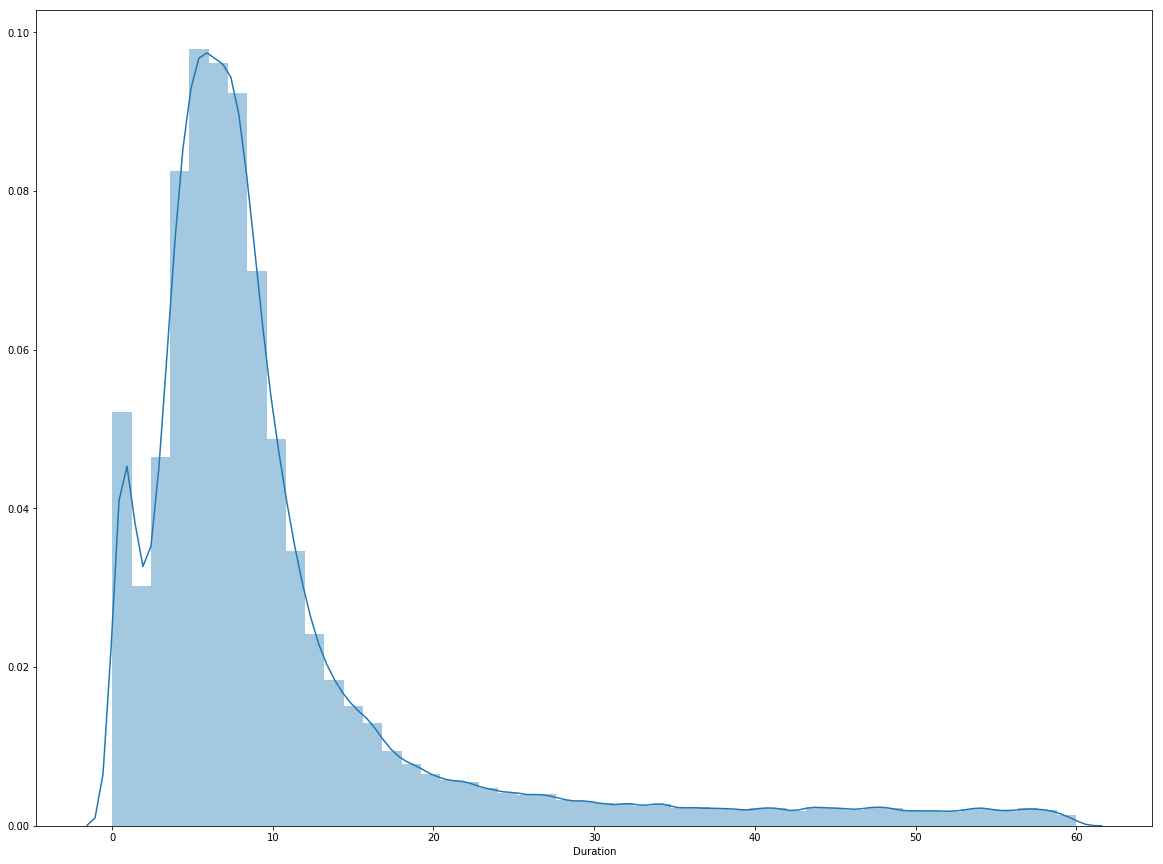

In [179]:
sns.distplot(dfCompleteTrips[dfCompleteTrips["Duration"] <= 60].Duration)
print(len(dfCompleteTrips[dfCompleteTrips["Duration"] <= 60].index)/len(dfCompleteTrips.index))
print(dfCompleteTrips.Duration.describe())
# 99.115% of trips are under 200minutes (3 hours 20 minutes)
# 96.1% are under 60 minutes

In [164]:
dfCompleteTrips.to_csv('CompletedMBikeTrips.csv',index='False')

In [151]:
#Count number of times each route is taken!
count_series = dfCompleteTrips.groupby(['StationName_S', 'StationName_E']).size()
dfRoutes = count_series.to_frame(name = 'Frequency').reset_index()
dfRoutes.head(5)
#dfRoutes.sort_values(by=['Frequency'], ascending=False)

,StationName_S,StationName_E,Frequency
0,Art Walk Station,Art Walk Station,118
1,Art Walk Station,Berwyn Trolley Trail,19
2,Art Walk Station,City Hall,34
3,Art Walk Station,College Park Metro West,14
4,Art Walk Station,Eppley,9


In [137]:
print(len(dfCompleteTrips[dfCompleteTrips['StationName_S'] == 'Stamp Student Union'].index))

5439


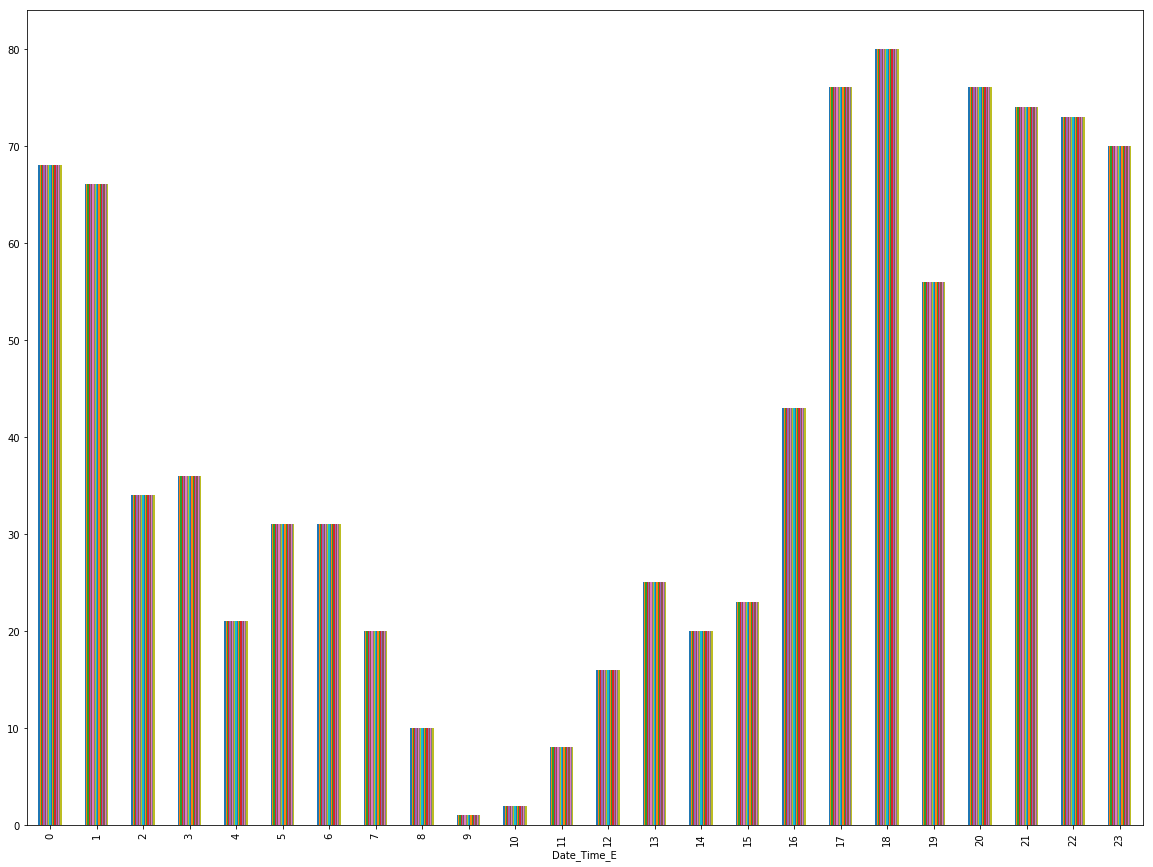

In [184]:
#Time dependent plot
dfNew =dfCompleteTrips[(dfCompleteTrips['StationName_S'] == 'City Hall') & (dfCompleteTrips['Day_S'] > 4)]
#dfNew =dfCompleteTrips[(dfCompleteTrips['Day_S'] >= 0) | (dfCompleteTrips['Day_S'] <= 4)]
#dfNew =dfCompleteTrips[(dfCompleteTrips['Day_S'] > 5)]

dfNew.groupby([dfNew["Date_Time_E"].dt.hour]).count().plot(kind="bar",legend=False)
#dfNew.groupby([dfNew["Date_Time_S"].dt.year, dfNew["Date_Time_S"].dt.month]).count().plot(kind="bar")

In [ ]:
#Can I make a plot of all routes, weighted by freq
folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(my_map)

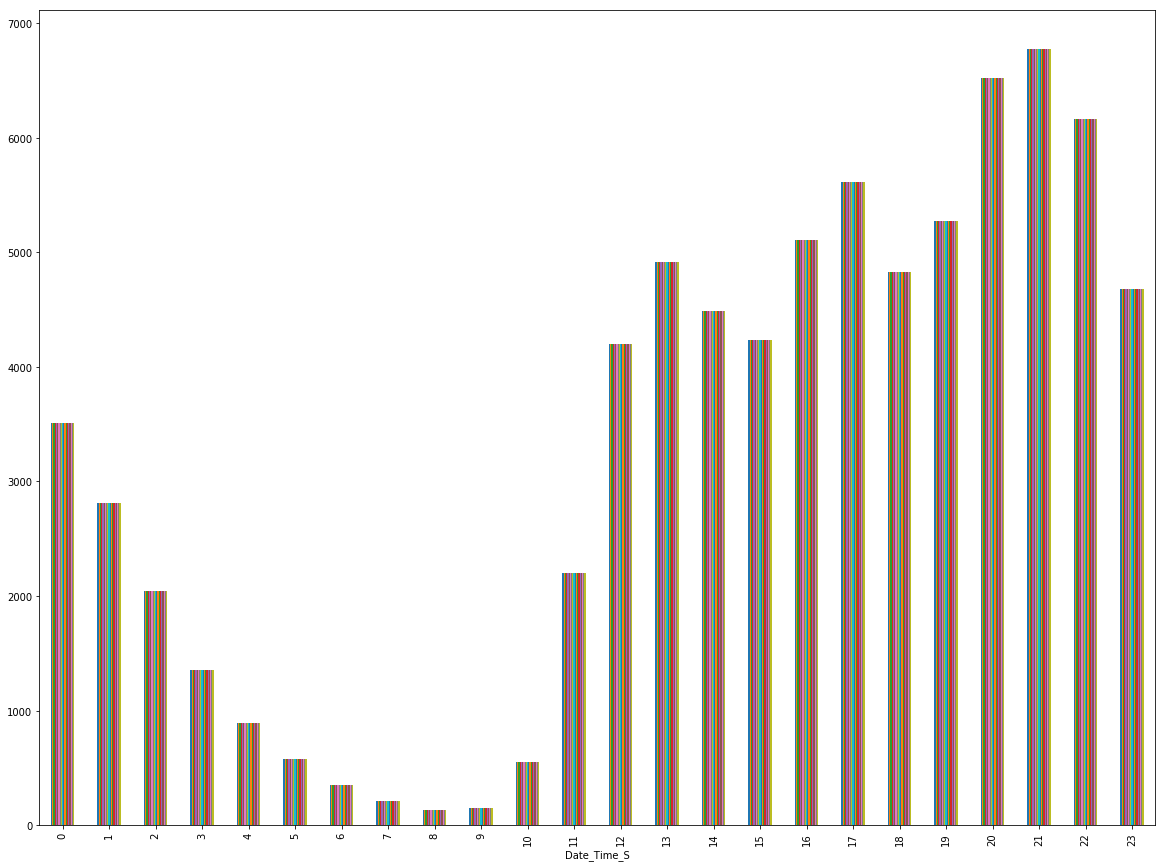

In [167]:
dfNew.groupby([dfNew["Date_Time_S"].dt.hour]).count().plot(kind="bar",legend=False)
